In [337]:
import pandas as pd

df = pd.read_csv('train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [338]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\perri\AppData\Local\Temp\ipykernel_948\610933292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [339]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [340]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

C:\Users\perri\AppData\Local\Temp\ipykernel_948\4086271142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [341]:
df.drop(columns=['Name', 'Cabin'], inplace=True)

In [342]:
df['Sex'] = df['Sex'].map({'female': 1, 'male' : 0})


In [343]:
df.drop(columns=['Ticket'], inplace=True)


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [345]:
df.drop(columns='PassengerId', inplace=True)

In [346]:
target_labels = df['Survived']
target_labels.to_numpy()
target_labels.shape

(891,)

In [347]:
values_df = df.drop(columns='Survived')
feature_names = values_df.columns.to_numpy()
values = values_df.to_numpy()


In [348]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
values = scaler.fit_transform(values)

In [349]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(values, target_labels, test_size=0.2, random_state=42)

In [350]:
X_train.shape

(712, 7)

In [351]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [352]:
predictions_test = model.predict(X_test)

In [353]:
from sklearn.metrics import classification_report

performances = classification_report(y_test, predictions_test, target_names=['Dead', 'Survived'])
print('Classification report:')
print(performances)

Classification report:
              precision    recall  f1-score   support

        Dead       0.82      0.85      0.83       105
    Survived       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Confusion Matrix
[[89 16]
 [20 54]]


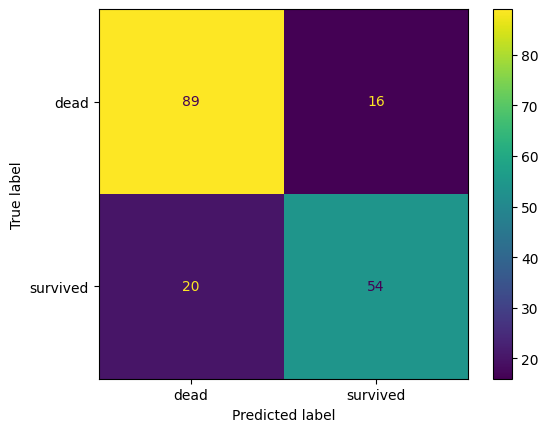

In [354]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Matrice di confusione
matrix = confusion_matrix(y_test, predictions_test)
print('Confusion Matrix')
print(matrix)
#visualizzazione matrice
visual = ConfusionMatrixDisplay(matrix, display_labels=['dead', 'survived'])
visual.plot()
plt.show()

In [355]:
import numpy as np

# Ottieni i coefficienti del modello
coefficients = model.coef_[0]
feature_names = values_df.columns

# Crea un DataFrame per visualizzare i coefficienti e le feature
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Importance'] = importance_df['Coefficient'].abs()  # Importanza come valore assoluto

# Ordina il DataFrame per importanza
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Coefficient  Importance
1       Sex     1.277973    1.277973
0    Pclass    -0.814996    0.814996
2       Age    -0.405313    0.405313
3     SibSp    -0.338071    0.338071
6  Embarked     0.141920    0.141920
5      Fare     0.137904    0.137904
4     Parch    -0.090777    0.090777


C:\Users\perri\AppData\Local\Temp\ipykernel_948\2252949873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


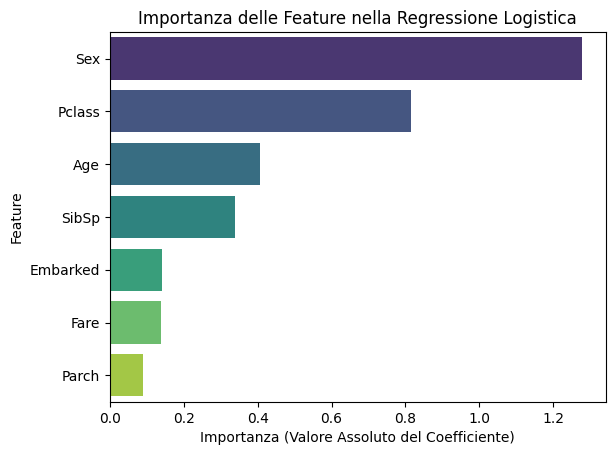

In [356]:
import seaborn as sns


sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Feature nella Regressione Logistica')
plt.xlabel('Importanza (Valore Assoluto del Coefficiente)')
plt.ylabel('Feature')
plt.show()

In [362]:
Class = 2
Sex = 1
Age = 22
SibSp = 0
Parch = 0
Fare = 7.5
Embarked = 0

new_persona = np.array([Class, Sex, Age, SibSp, Parch, Fare, Embarked])
#new_persona = scaler.fit_transform(new_persona)
new_persona = new_persona.reshape(-1, 7)
new_persona = scaler.transform(new_persona)
# Otteniamo le probabilità predette per ciascuna classe
probabilities = model.predict_proba(new_persona)

# Stampa le probabilità per ciascuna classe
print("Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto):", probabilities)

# La classe predetta sarà quella con la probabilità più alta
prediction = model.predict(new_persona)
print("Classe predetta:", prediction)



Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto): [[0.15560194 0.84439806]]
Classe predetta: [1]


In [358]:
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)


# # %%
# predictions_test = model.predict(X_test)

# # %%
# from sklearn.metrics import classification_report

# performances = classification_report(y_test, predictions_test, target_names=['Dead', 'Survived'])
# print('Classification report:')
# print(performances)

# # %%
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# #Matrice di confusione
# matrix = confusion_matrix(y_test, predictions_test)
# print('Confusion Matrix')
# print(matrix)
# #visualizzazione matrice
# visual = ConfusionMatrixDisplay(matrix, display_labels=['dead', 'survived'])
# visual.plot()
# plt.show()

# # %%
# import numpy as np



# # Crea un DataFrame per visualizzare i coefficienti e le feature
# importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# importance_df['Importance'] = model.feature_importances_  # Importanza come valore assoluto

# # Ordina il DataFrame per importanza
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print(importance_df)

# # %%
# import seaborn as sns


# sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
# plt.title('Importanza delle Feature nel random tree')
# plt.xlabel('Importanza')
# plt.ylabel('Feature')
# plt.show()

# # %%
# Class = 2
# Sex = 1
# Age = 22
# SibSp = 0
# Parch = 0
# Fare = 7.25
# Embarked = 0

# new_persona = np.array([Class, Sex, Age, SibSp, Parch, Fare, Embarked])
# #new_persona = scaler.fit_transform(new_persona)
# new_persona = new_persona.reshape(-1, 7)
# new_persona = scaler.transform(new_persona)
# # Otteniamo le probabilità predette per ciascuna classe
# probabilities = model.predict_proba(new_persona)

# # Stampa le probabilità per ciascuna classe
# print("Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto):", probabilities)

# # La classe predetta sarà quella con la probabilità più alta
# prediction = model.predict(new_persona)
# print("Classe predetta:", prediction)


In [359]:
Class = 3
Sex = 1
Age = 24
SibSp = 0
Parch = 0
Fare = 100
Embarked = 1

new_persona = np.array([Class, Sex, Age, SibSp, Parch, Fare, Embarked])
#new_persona = scaler.fit_transform(new_persona)
new_persona = new_persona.reshape(-1, 7)
new_persona = scaler.transform(new_persona)
# Otteniamo le probabilità predette per ciascuna classe
probabilities = model.predict_proba(new_persona)

# Stampa le probabilità per ciascuna classe
print("Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto):", probabilities)

# La classe predetta sarà quella con la probabilità più alta
prediction = model.predict(new_persona)
print("Classe predetta:", prediction)

Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto): [[0.24343982 0.75656018]]
Classe predetta: [1]


In [360]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.feature_selection import RFE

# model = KNeighborsClassifier()
# model.fit(X_train, y_train)


# # %%
# predictions_test = model.predict(X_test)

# # %%
# from sklearn.metrics import classification_report

# performances = classification_report(y_test, predictions_test, target_names=['Dead', 'Survived'])
# print('Classification report:')
# print(performances)

# # %%
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# #Matrice di confusione
# matrix = confusion_matrix(y_test, predictions_test)
# print('Confusion Matrix')
# print(matrix)
# #visualizzazione matrice
# visual = ConfusionMatrixDisplay(matrix, display_labels=['dead', 'survived'])
# visual.plot()
# plt.show()

# # Analisi dell'importanza delle feature utilizzando RFE con un modello di regressione logistica
# estimator = LogisticRegression()
# selector = RFE(estimator, n_features_to_select=1)
# selector = selector.fit(X_train, y_train)

# # Ottieni le feature supportate e il ranking
# ranking = selector.ranking_

# # Crea un DataFrame per visualizzare il ranking delle feature
# importance_df = pd.DataFrame({'Feature': values_df.columns, 'Ranking': ranking})
# importance_df.sort_values(by='Ranking', ascending=True, inplace=True)

# print(importance_df)

# # Grafico a barre dell'importanza delle feature
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Ranking', y='Feature', data=importance_df, palette='viridis')
# plt.title('Ranking delle Feature utilizzando RFE')
# plt.xlabel('Ranking (1 = più importante)')
# plt.ylabel('Feature')
# plt.show()

# # %%
# Class = 2
# Sex = 0
# Age = 22
# SibSp = 0
# Parch = 0
# Fare = 7.5
# Embarked = 0

# new_persona = np.array([Class, Sex, Age, SibSp, Parch, Fare, Embarked])
# #new_persona = scaler.fit_transform(new_persona)
# new_persona = new_persona.reshape(-1, 7)
# new_persona = scaler.transform(new_persona)
# # Otteniamo le probabilità predette per ciascuna classe
# probabilities = model.predict_proba(new_persona)

# # Stampa le probabilità per ciascuna classe
# print("Probabilità per ciascuna classe (Non Sopravvissuto, Sopravvissuto):", probabilities)

# # La classe predetta sarà quella con la probabilità più alta
# prediction = model.predict(new_persona)
# print("Classe predetta:", prediction)
